# Prepration

- In order to train the Yolo v3 model, we will need to compile `darknet` which is an open source neural network framework written in C and CUDA. 
- Once the `darknet` is compiled, we will download the exported data set from HyperLabel


**Note**: Before starting to work, change the runtime to use the GPU.

If you don't have any dataset or pretrained model (weight) for that dataset, you can use our demo data set and trained weight.

Copy the following files to your Google drive (create a new folder called `ml` in your Google drive and put the files in there)

- [Dataset](https://drive.google.com/file/d/1wxHNFR2xXx6wJMJR2ey2NP_rWFJNs8-I/view?usp=sharing)
- [Pre trained weight](https://drive.google.com/file/d/1-5iEJhBgwRGBZ_ZBfO6Juo2tF6lGa4b6/view?usp=sharing)


### Clone darknet

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13714, done.
remote: Total 13714 (delta 0), reused 0 (delta 0), pack-reused 13714
Receiving objects: 100% (13714/13714), 12.30 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (9354/9354), done.


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!apt install libopencv-dev python-opencv ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  python-opencv
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 535 kB of archives.
After this operation, 2,944 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Fetched 535 kB in 2s (282 kB/s)
Selecting previously unselected package python-opencv.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../python-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python-opencv (3.2.0+dfsg-4ubuntu0.1) ...
S

### Compile darknet

In [26]:
#gpu
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

[Errno 20] Not a directory: 'darknet'
/content/darknet
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0 # ZED SDK 3.0 and above
ZED_CAMERA_v2_8=0 # ZED SDK 2.X

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gen

In [4]:
#cpu
"""
%cd /content/darknet
!make
!chmod +x ./darknet
"""

/content/darknet
chmod +x *.sh


### Download the data set exported from HyperLabel


In [4]:
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/yolo-dataset.zip' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Mounted at /content/gdrive
Successfully downloaded the dataset


In [6]:
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/obj.data' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [7]:
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/test.zip' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [8]:
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/test.txt' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [9]:
DOWNLOAD_LOCATION = '/content/darknet/src'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/image.c' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [35]:
DOWNLOAD_LOCATION = '/content/darknet/data'
DRIVE_DATASET_FILE = '/content/drive/My Drive/ml/nvid.mp4' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

OSError: ignored

### Unzip the dataset

In [0]:
!unzip data/yolo-dataset.zip -d data/ # adjust the dataset filename which you have downloaded from Google drive

In [0]:
!unzip data/test.zip -d data/

##Training the model

- Download the initial weight
- Train the model

### Download initial pre-trained weights for the convolutional layers (If you have already trained and saved the weights to your Google drive, you can skip this)

In [0]:
#!wget https://pjreddie.com/media/files/darknet53.conv.74

### Set Yolo configurations

We need to set configurations for Yolo in order to properly train. There are few settings which we need to change in the default yolov3.cfg file.

- batch
- subdivisions (if you get memory out error, increase this 16, 32 or 64)
- max_batches (it should be classes*2000)
- steps (it should be 80%, 90% of max_batches)
- classes (the number of classes which you are going to train)
- filters (the value for filters can be calculated using (classes + 5)x3 )

Change the values below as per your requirement

In [0]:
!sed -i 's/batch=1/batch=64/g' cfg/yolov3.cfg
!sed -i 's/subdivisions=1/subdivisions=32/g' cfg/yolov3.cfg
!sed -i 's/max_batches = 500200/max_batches = 40000/g' cfg/yolov3.cfg
!sed -i 's/steps=400000,450000/steps=32000,36000/g' cfg/yolov3.cfg
!sed -i 's/classes=80/classes=20/g' cfg/yolov3.cfg
!sed -i 's/filters=255/filters=75/g' cfg/yolov3.cfg
!cat cfg/yolov3.cfg

**Now we are moving forward with the training part. If you have already trained the model, you can fetch them from Google drive and skip the training part.**

In [13]:
# Only run this cell, if you have already trained the model and have weights and backup files in your Google drive
# (Optional) Download the pretrained weight from Google drive

import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
BACKUP_FOLDER = '/content/darknet/backup'
DRIVE_YOLO_BACKUP = '/content/gdrive/My Drive/ml/yolov3_2000.weights'

shutil.copy(DRIVE_YOLO_BACKUP, BACKUP_FOLDER)

print('Successfully fetched the pretrained files for Yolo from Google drive')

Successfully fetched the pretrained files for Yolo from Google drive


### Start the training

It will take a long time to complete, so sit back and relax

Note: If during training you see nan values for avg (loss) field - then training goes wrong, but if nan is in some other lines - then training goes well.

- file yolo-obj_last.weights will be saved to the darknet/backup for each 100 iterations
- file yolo-obj_xxxx.weights will be saved to the darknet/backup for each 1000 iterations
- After each 100 iterations if you want, you can stop and later start training from this point. For example, after 2000 iterations you can stop training, and later just start training using: darknet detector train data/obj.data yolov3.cfg backup/yolo-obj_2000.weights

In [0]:
# use the line below to train a fresh model
#!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3.cfg darknet53.conv.74

# use the line below to retrain your previous saved weight
!./darknet detector train data/obj.data cfg/yolov3.cfg backup/yolov3_last.weights

In [14]:
# Once you have trained your model, you can save them to your Google drive. So that next time, you don't need to retrain
# This step is optional, you can skip it if you want
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
YOLO_BACKUP = '/content/darknet/backup/yolov3_2000.weights' #adjust the backup file name or keep it default
DRIVE_DIR = '/content/gdrive/My Drive/ml/' #adjust path in your Google drive, or keep it default

shutil.copy(YOLO_BACKUP, DRIVE_DIR)

print('Saved training data to drive at: ' + DRIVE_DIR)

Saved training data to drive at: /content/gdrive/My Drive/ml/


## Running predictions

In [0]:
!./darknet detector test data/obj.data cfg/yolov3.cfg backup/yolov3_2000.weights data/test/0010.jpg

In [0]:
!./darknet detector test data/obj.data cfg/yolov3.cfg backup/yolov3_2000.weights -dont_show < data/test.txt > result1.csv

In [0]:
!./darknet detector demo data/obj.data cfg/yolov3.cfg backup/yolov3_2000.weights /content/darknet/data/nvid.mp4 

Streaming output truncated to the last 5000 lines.
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream stopped! 
 Video-stream st

In [36]:
!./darknet detector demo data/obj.data cfg/yolov3.cfg backup/yolov3_2000.weights -thresh 0.40  -dont_show < /content/darknet/data/nvid.mp4 >  -out_filename /content/darknet/data/detvid.mp4

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv  

## PLAY VIDEO

In [0]:
import io
import base64
from IPython.display import HTML
video = io.open('/content/darknet/data/detvid.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''.format(encoded.decode('ascii')))

### Display result

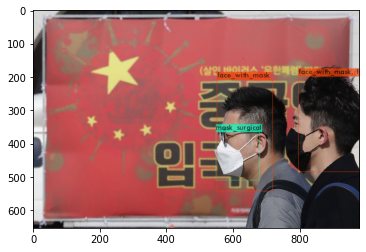

In [26]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    else:
      print('failed to open file')
    
display_image()